In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/hotel_bookings.csv


In [ ]:
train_hotel = pd.read_csv('/kaggle/input/hotel_bookings.csv')

In [ ]:
train_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
train_hotel.shape

(119390, 32)

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

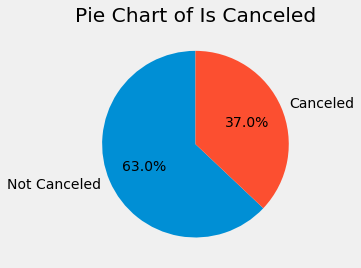

In [ ]:
import matplotlib.pyplot as plt
val = train_hotel['is_canceled'].value_counts()
label = ['Not Canceled', 'Canceled']

plt.pie(val, labels = label, startangle = 90, autopct = '%.1f%%')
plt.title('Pie Chart of Is Canceled')
plt.show()

In [ ]:
train_hotel.groupby(['country'])['country'].count().sort_values(ascending= False)

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
NAM        1
NCL        1
DMA        1
NIC        1
BHS        1
Name: country, Length: 177, dtype: int64

In [ ]:
train_hotel.groupby(['arrival_date_year'])['arrival_date_year'].count()

arrival_date_year
2015    21996
2016    56707
2017    40687
Name: arrival_date_year, dtype: int64

In [ ]:
train_hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
v = train_hotel['is_canceled']

In [ ]:
train_hotel['children'] = train_hotel['children'].fillna(0)
train_hotel['agent'] = train_hotel['agent'].fillna(0)
train_hotel['company'] = train_hotel['company'].fillna(0)
train_hotel['country'] = train_hotel['country'].fillna('Unknown')

In [ ]:
train_hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
train_hotel['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'Unknown', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN',
       'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY',
       'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
       'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM',
       'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS',
       'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI',
       'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU',
       'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI',
       'STP', 'KN

In [ ]:
train_hotel['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
NAM        1
ATF        1
MRT        1
HND        1
BDI        1
Name: country, Length: 178, dtype: int64

In [ ]:
train_hotel['adr'].value_counts()

62.00     3754
75.00     2715
90.00     2473
65.00     2418
0.00      1959
          ... 
202.74       1
87.64        1
69.83        1
160.83       1
35.64        1
Name: adr, Length: 8879, dtype: int64

In [ ]:
train_hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
train_hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
train_hotel.groupby(['reserved_room_type','hotel'])['hotel'].count()

reserved_room_type  hotel       
A                   City Hotel      62595
                    Resort Hotel    23399
B                   City Hotel       1115
                    Resort Hotel        3
C                   City Hotel         14
                    Resort Hotel      918
D                   City Hotel      11768
                    Resort Hotel     7433
E                   City Hotel       1553
                    Resort Hotel     4982
F                   City Hotel       1791
                    Resort Hotel     1106
G                   City Hotel        484
                    Resort Hotel     1610
H                   Resort Hotel      601
L                   Resort Hotel        6
P                   City Hotel         10
                    Resort Hotel        2
Name: hotel, dtype: int64

Text(0, 0.5, 'Density')

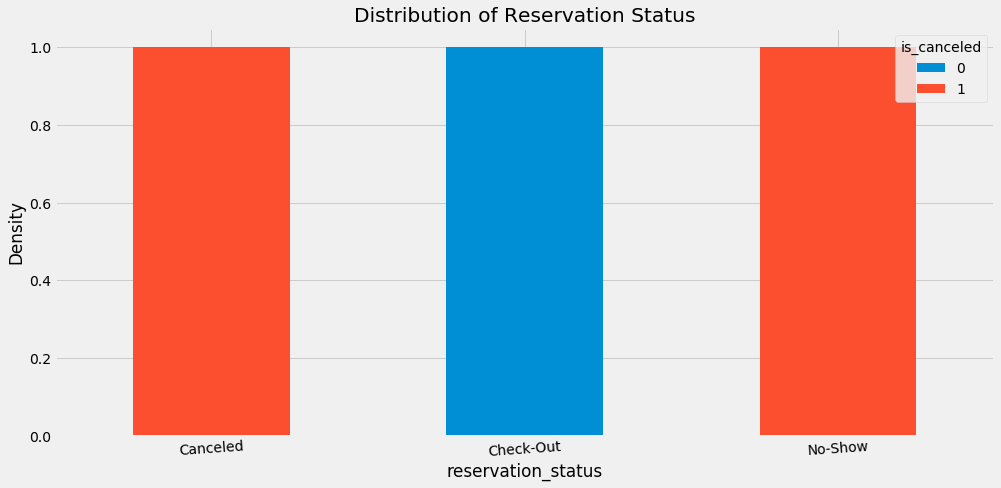

In [ ]:
#Full Stacked Barplot cross selling berdasarkan deposit

ic_deposit = pd.crosstab(train_hotel['is_canceled'], train_hotel['reservation_status'])
ic_deposit = ic_deposit.div(ic_deposit.sum())
ax = ic_deposit.T.plot(kind='bar', stacked = True, rot = 4, figsize = (15,7),
                 title = 'Distribution of Reservation Status')
plt.ylabel('Density')


In [ ]:
kok = []
for i in train_hotel['reservation_status']:
    if i == 'Canceled':
        kok.append(1)
    elif i =='No-Show':
        kok.append(1)
    else:
        kok.append(0)

In [ ]:
train_hotel['reservation_status'] = kok

In [ ]:
train_hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,0,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,0,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,0,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,0,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,0,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,0,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,0,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,0,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,0,2017-09-07


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_hotel['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [ ]:
train_hotel['guess'] = train_hotel['adults']+train_hotel['children']

#asumsi bayi tidak membayar kamar


In [ ]:
train_hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
resort = train_hotel.loc[(train_hotel['hotel'] == 'Resort Hotel')]
city = train_hotel.loc[(train_hotel['hotel'] == 'City Hotel')]

In [ ]:
city.groupby(['country'])['country'].count().sort_values(ascending= False)

country
PRT    30960
FRA     8804
DEU     6084
GBR     5315
ESP     4611
       ...  
JAM        1
HND        1
COM        1
GUY        1
KIR        1
Name: country, Length: 167, dtype: int64

In [ ]:
resort.groupby(['country'])['country'].count()

country
AGO    24
ALB     3
AND     5
ARE    11
ARG    57
       ..
VEN     3
VNM     2
ZAF    18
ZMB     1
ZWE     2
Name: country, Length: 126, dtype: int64

In [ ]:
city['country'].value_counts()

PRT    30960
FRA     8804
DEU     6084
GBR     5315
ESP     4611
       ...  
AIA        1
SDN        1
SYC        1
KIR        1
ATF        1
Name: country, Length: 167, dtype: int64

In [ ]:
train_hotel = train_hotel.loc[(train_hotel['guess'] >= 1)]

In [ ]:
train_hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,guess
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.00,0,0,0,2015-07-01,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.00,0,0,0,2015-07-01,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.00,0,0,0,2015-07-02,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.00,0,0,0,2015-07-02,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.00,0,1,0,2015-07-03,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,0.0,0,Transient,96.14,0,0,0,2017-09-06,2.0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,0.0,0,Transient,225.43,0,2,0,2017-09-07,3.0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,0.0,0,Transient,157.71,0,4,0,2017-09-07,2.0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,0.0,0,Transient,104.40,0,0,0,2017-09-07,2.0


In [ ]:
train_hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:

#ic_deposit = pd.crosstab(train_hotel['hotel'], train_hotel['arrival_date_month'])
#ic_deposit = ic_deposit.div(ic_deposit.sum())
#ax = ic_deposit.T.plot(kind='bar', stacked = True, rot = 1, figsize = (4,4),
 #                title = 'Month_Date')

Penambahan Feature Harga

In [ ]:
price= train_hotel['adr']/(train_hotel['guess'])

In [ ]:
train_hotel['price']=price

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
resorthotel = train_hotel.loc[(train_hotel['hotel'] == 'Resort Hotel')]
cityhotel = train_hotel.loc[(train_hotel['hotel'] == 'City Hotel')]

In [ ]:
resorthotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,guess,price
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.00,0,0,0,2015-07-01,2.0,0.000000
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.00,0,0,0,2015-07-01,2.0,0.000000
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.00,0,0,0,2015-07-02,1.0,75.000000
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.00,0,0,0,2015-07-02,1.0,75.000000
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0.0,0,Transient,98.00,0,1,0,2015-07-03,2.0,49.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,...,0.0,0,Transient,89.75,0,0,0,2017-09-10,3.0,29.916667
40056,Resort Hotel,0,169,2017,August,35,30,2,9,2,...,0.0,0,Transient-Party,202.27,0,1,0,2017-09-10,2.0,101.135000
40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,...,0.0,0,Transient,153.57,0,3,0,2017-09-12,2.0,76.785000
40058,Resort Hotel,0,211,2017,August,35,31,4,10,2,...,0.0,0,Contract,112.80,0,1,0,2017-09-14,2.0,56.400000


In [ ]:
cityhotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,guess,price
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,0.0,0,Transient,0.00,0,0,0,2015-07-03,1.0,0.000000
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,0.0,0,Transient,76.50,0,1,1,2015-07-01,2.0,38.250000
40062,City Hotel,1,65,2015,July,27,1,0,4,1,...,0.0,0,Transient,68.00,0,1,1,2015-04-30,1.0,68.000000
40063,City Hotel,1,92,2015,July,27,1,2,4,2,...,0.0,0,Transient,76.50,0,2,1,2015-06-23,2.0,38.250000
40064,City Hotel,1,100,2015,July,27,2,0,2,2,...,0.0,0,Transient,76.50,0,1,1,2015-04-02,2.0,38.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0.0,0,Transient,96.14,0,0,0,2017-09-06,2.0,48.070000
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0.0,0,Transient,225.43,0,2,0,2017-09-07,3.0,75.143333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0.0,0,Transient,157.71,0,4,0,2017-09-07,2.0,78.855000
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0.0,0,Transient,104.40,0,0,0,2017-09-07,2.0,52.200000


In [ ]:
pricer= resorthotel['adr']/(resorthotel['adults']+resorthotel['children'])
pricec= cityhotel['adr']/(cityhotel['adults']+cityhotel['children'])

In [ ]:
#menghitung rata2 harga hotel resort dan city
price_resort_mean= sum(resorthotel['adr'])/(sum(resorthotel['adults'])+sum(resorthotel['children']))
price_city_mean= sum(cityhotel['adr'])/(sum(cityhotel['adults'])+sum(cityhotel['children']))


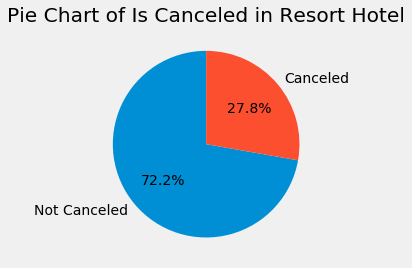

In [ ]:
res = resorthotel['is_canceled'].value_counts()
label = ['Not Canceled', 'Canceled']

plt.pie(res, labels = label, startangle = 90, autopct = '%.1f%%')
plt.title('Pie Chart of Is Canceled in Resort Hotel')
plt.show()

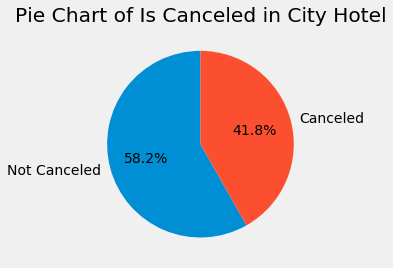

In [ ]:
cit = cityhotel['is_canceled'].value_counts()
label = ['Not Canceled', 'Canceled']

plt.pie(cit, labels = label, startangle = 90, autopct = '%.1f%%')
plt.title('Pie Chart of Is Canceled in City Hotel')
plt.show()

In [ ]:
price_resort_mean

47.5752799769868

In [ ]:
price_city_mean

54.203166218863

In [ ]:
resorthotel['price'] = pricer
cityhotel['price'] = pricec

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train_hotel= pd.concat([resorthotel, cityhotel], ignore_index=True, sort =False)

In [ ]:
train_hotel['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [ ]:
#train_hotel = train_hotel.sort_values(by='Month',inplace=True)
from datetime import datetime

theList = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month = datetime.now().month
newList = list()
for i in range(12):
    newList.append(theList[(month-1+i)%12])

print(newList)

['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar']


In [ ]:
plt.style.use('fivethirtyeight')

Text(0.5, 1.0, 'Distribution of Deposit Type')

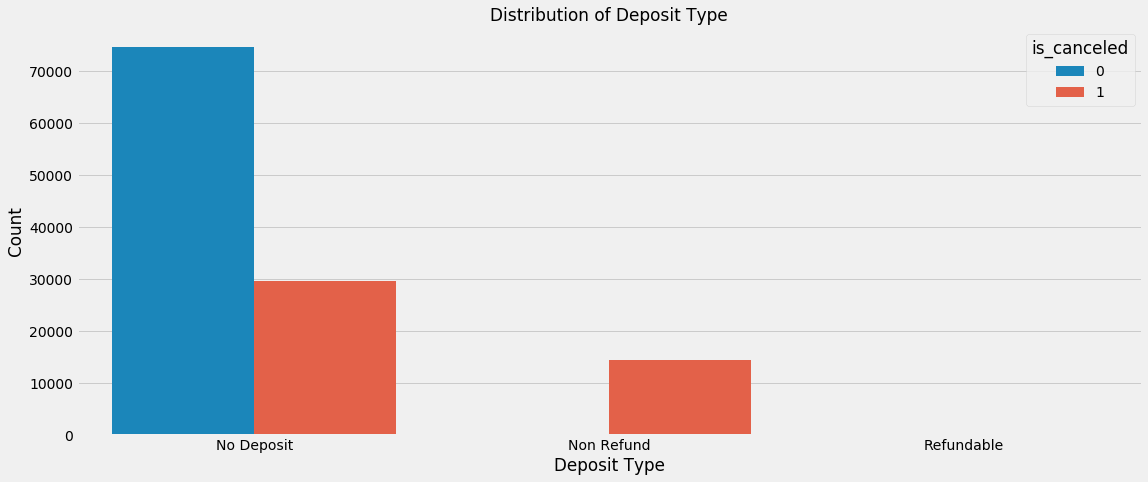

In [ ]:
plt.figure(figsize=(17,7))

sns.countplot(data = train_hotel, x = 'deposit_type', hue = 'is_canceled', order = ['No Deposit', 'Non Refund', 'Refundable']).set_title('Distribution of Deposit Type',fontsize=15)
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.title('Distribution of Deposit Type',fontsize=17)
#plt.style.use("bmh")

In [ ]:
plt.style.use('seaborn')

Text(0.5, 1.0, 'Distribution of Cutomer Type')

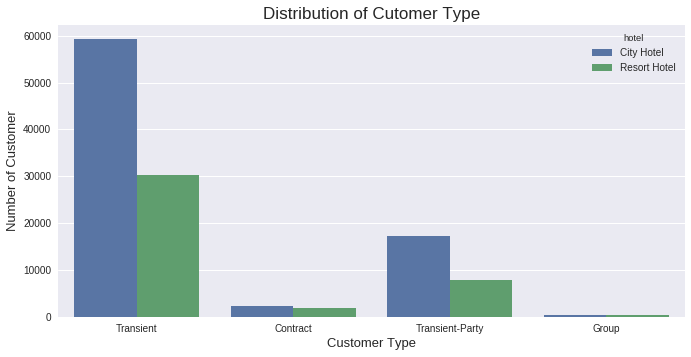

In [ ]:
plt.figure(figsize=(10,5))

sns.countplot(data = train_hotel, x = 'customer_type', hue = 'hotel', hue_order = ["City Hotel", "Resort Hotel"])
plt.xlabel('Customer Type', fontsize = 13)
plt.ylabel('Number of Customer', fontsize=13)
plt.title('Distribution of Cutomer Type', fontsize=17)
#plt.style.use('classic')

In [ ]:
train_hotel.groupby(['deposit_type','is_canceled'])['is_canceled'].count()

deposit_type  is_canceled
No Deposit    0              74792
              1              29669
Non Refund    0                 93
              1              14494
Refundable    0                126
              1                 36
Name: is_canceled, dtype: int64

Text(0.5, 1.0, 'Distribution of Market Segment')

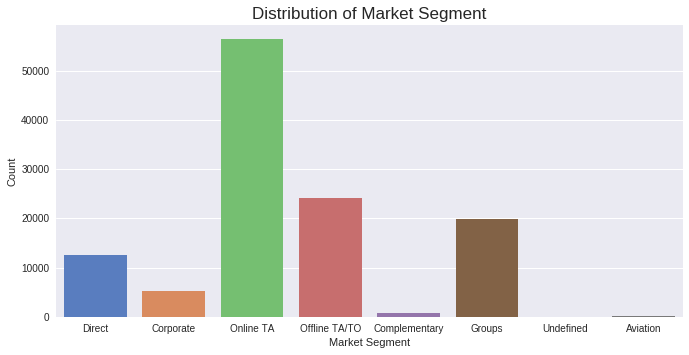

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data = train_hotel, x = 'market_segment', palette='muted')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.title('Distribution of Market Segment', fontsize = 17)
#sns.set_style('darkgrid')
#sns.set(style="ticks", context="talk")
#plt.style.use("bmh")

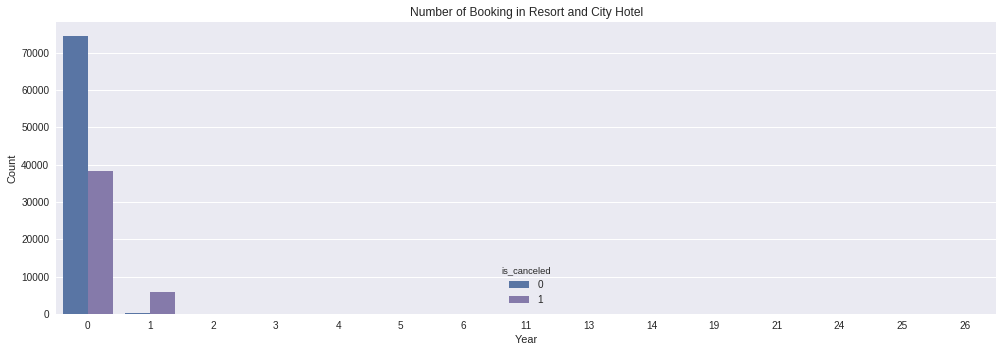

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data = train_hotel, x = 'previous_cancellations', hue = 'is_canceled', palette=["C0", "C3"])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Booking in Resort and City Hotel')
#sns.set_style('darkgrid')
#sns.set(style="ticks", context="talk")
plt.style.use("bmh")

In [ ]:
train_hotel['previous_cancellations'].unique()

array([ 0,  1,  2,  3, 26, 25, 14,  4, 24, 19,  5, 21,  6, 13, 11])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Online TA        47.318178
Offline TA/TO    20.285211
Groups           16.601795
Direct           10.554484
Corporate         4.430836
Complementary     0.610687
Aviation          0.197131
Undefined         0.001678
Name: market_segment, dtype: float64


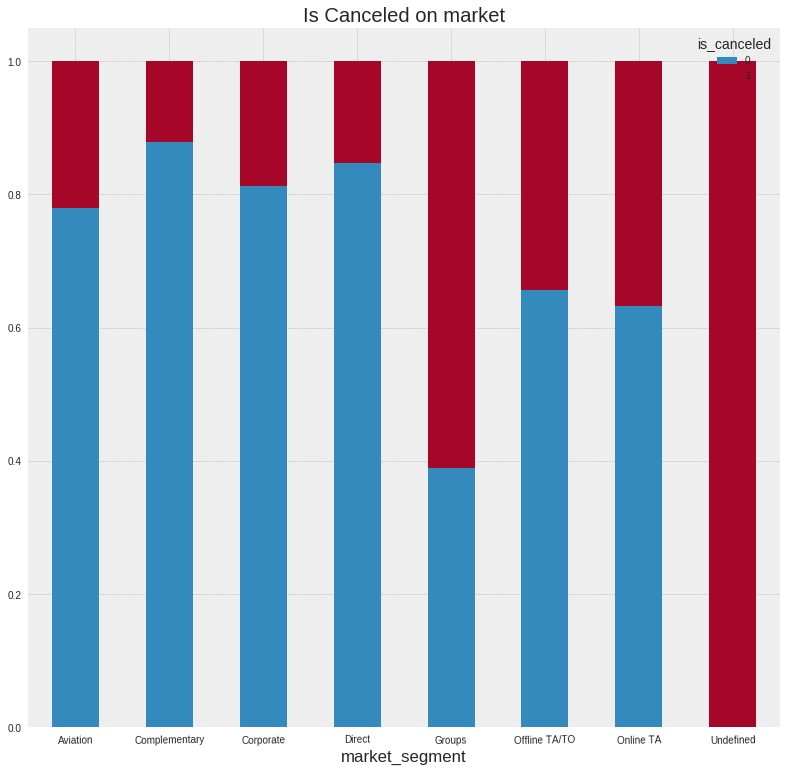

In [ ]:
print(train_hotel['market_segment'].value_counts().div(len(train_hotel['market_segment']))*100)

#Full Stacked Barplot cross selling berdasarkan deposit

ic_meal = pd.crosstab(train_hotel['is_canceled'], train_hotel['market_segment'])
ic_meal = ic_meal.div(ic_meal.sum())
ax = ic_meal.T.plot(kind='bar', stacked = True, rot = 1, figsize = (12,12),
                 title = 'Is Canceled on market')

TA/TO        81.998155
Direct       12.256522
Corporate     5.579230
GDS           0.161899
Undefined     0.004194
Name: distribution_channel, dtype: float64


Text(0, 0.5, 'density')

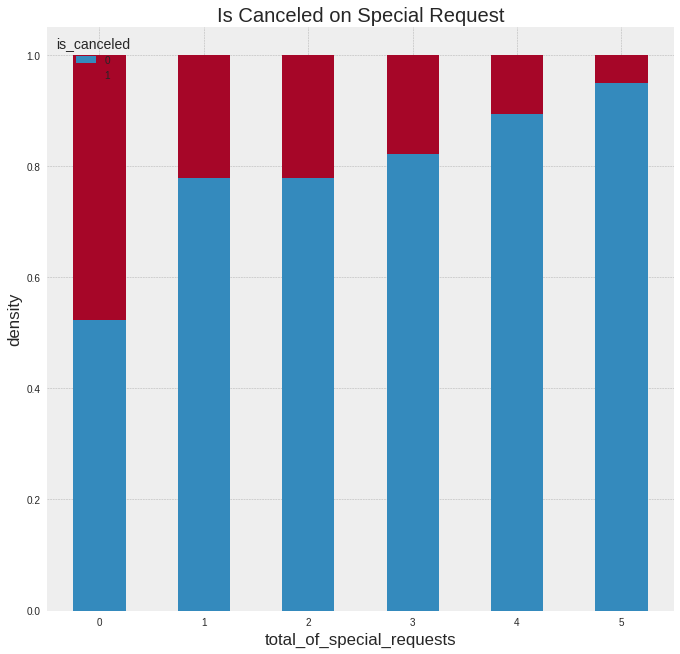

In [ ]:
print(train_hotel['distribution_channel'].value_counts().div(len(train_hotel['distribution_channel']))*100)

#Full Stacked Barplot cross selling berdasarkan deposit

ic_meal = pd.crosstab(train_hotel['is_canceled'], train_hotel['total_of_special_requests'])
ic_meal = ic_meal.div(ic_meal.sum())
ax = ic_meal.T.plot(kind='bar', stacked = True, rot = 1, figsize = (10,10),
                 title = 'Is Canceled on Special Request')
plt.ylabel('density')

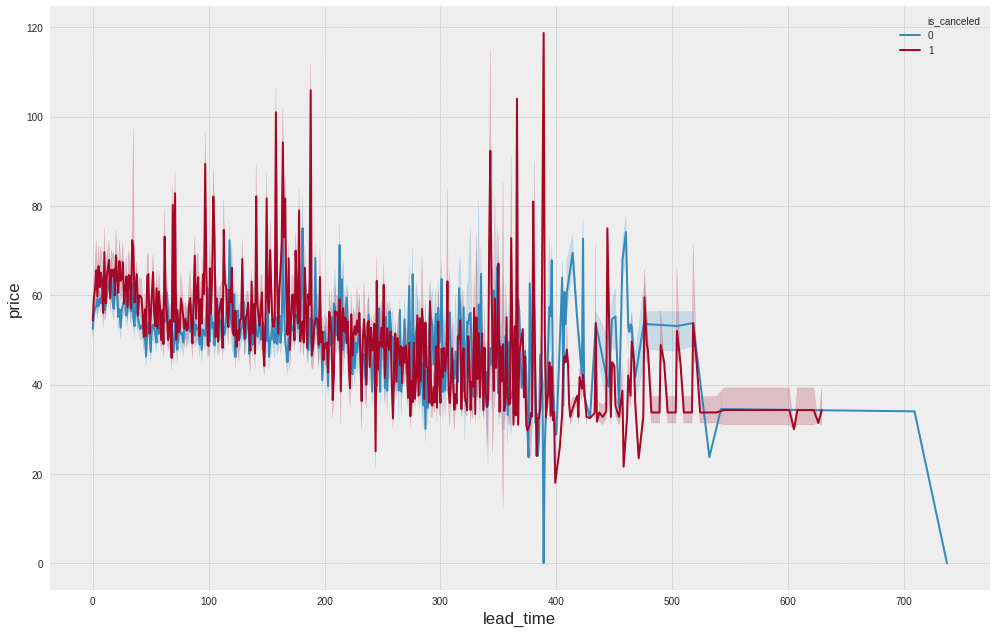

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x="lead_time", y="price",hue = 'is_canceled', data=train_hotel)

import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(70, 50))
col = ['price']
positions = train_hotel[train_hotel['is_canceled'] == 1]
positionss = train_hotel[train_hotel['is_canceled'] == 0]

plt.bar(positions['arrival_date_month'], positions['price'], color="b")
plt.legend('Yes')

plt.bar(positionss['arrival_date_month'], positionss['price'], color="g")
plt.legend('No')

plt.ylabel('price')


In [ ]:
train_hotel['hotel'].value_counts()

City Hotel      79163
Resort Hotel    40047
Name: hotel, dtype: int64

In [ ]:
train_hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
train_hotel.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

hotel                        2
arrival_date_month          12
meal                         5
country                    178
market_segment               8
distribution_channel         5
reserved_room_type           9
assigned_room_type          11
deposit_type                 3
customer_type                4
reservation_status_date    926
dtype: int64

In [ ]:
train_hotel.select_dtypes('int').apply(pd.Series.nunique, axis = 0)

is_canceled                         2
lead_time                         479
arrival_date_year                   3
arrival_date_week_number           53
arrival_date_day_of_month          31
stays_in_weekend_nights            17
stays_in_week_nights               33
adults                             14
babies                              5
is_repeated_guest                   2
previous_cancellations             15
previous_bookings_not_canceled     73
booking_changes                    19
days_in_waiting_list              127
required_car_parking_spaces         5
total_of_special_requests           6
reservation_status                  2
dtype: int64

In [ ]:
train_hotel['required_car_parking_spaces'].unique()

array([0, 1, 2, 8, 3])

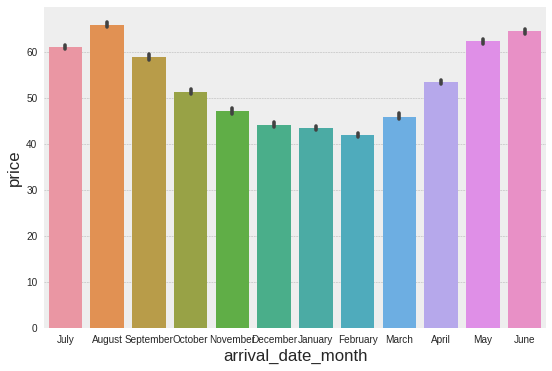

In [ ]:
sns.barplot(x= 'arrival_date_month', y = 'price', data=train_hotel, hue_order = ['Resort Hotel', 'City Hotel'])

In [ ]:
cancel_corr = train_hotel.corr()['is_canceled']
cancel_corr.abs().sort_values(ascending= False)[1:]

reservation_status                1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
guess                             0.049894
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
price                             0.017808
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [ ]:
train_hotel.groupby(['required_car_parking_spaces', 'is_canceled'])['is_canceled'].count()

required_car_parking_spaces  is_canceled
0                            0              67602
                             1              44199
1                            0               7376
2                            0                 28
3                            0                  3
8                            0                  2
Name: is_canceled, dtype: int64

In [ ]:
train_hotel['days_in_waiting_list'].unique()

array([  0,  50,  47,  65, 122,  75, 101, 150, 125,  14,  60,  34, 100,
        22, 121,  61,  39,   5,   1,   8, 107,  43,  52,   2,  11, 142,
       116,  13,  44,  97,  83,   4, 113,  18,  20, 185,  93, 109,   6,
        37, 105, 154,  64,  99,  38,  48,  33,  77,  21,  80,  59,  40,
        58,  89,  53,  49,  69,  87,  91,  57, 111,  79,  98,  85,  63,
        15,   3,  41, 224,  31,  56, 187, 176,  71,  55,  96, 236, 259,
       207, 215, 160, 120,  30,  32,  27,  62,  24, 108, 147, 379,  70,
        35, 178, 330, 223, 174, 162, 391,  68, 193,  10,  76,  16,  28,
         9, 165,  17,  25,  46,   7,  84, 175, 183,  23, 117,  12,  54,
        26,  73,  45,  19,  42,  72,  81,  74, 167,  36])

In [ ]:
train_hotel.groupby(['required_car_parking_spaces','is_canceled'])['is_canceled'].count()

required_car_parking_spaces  is_canceled
0                            0              67602
                             1              44199
1                            0               7376
2                            0                 28
3                            0                  3
8                            0                  2
Name: is_canceled, dtype: int64

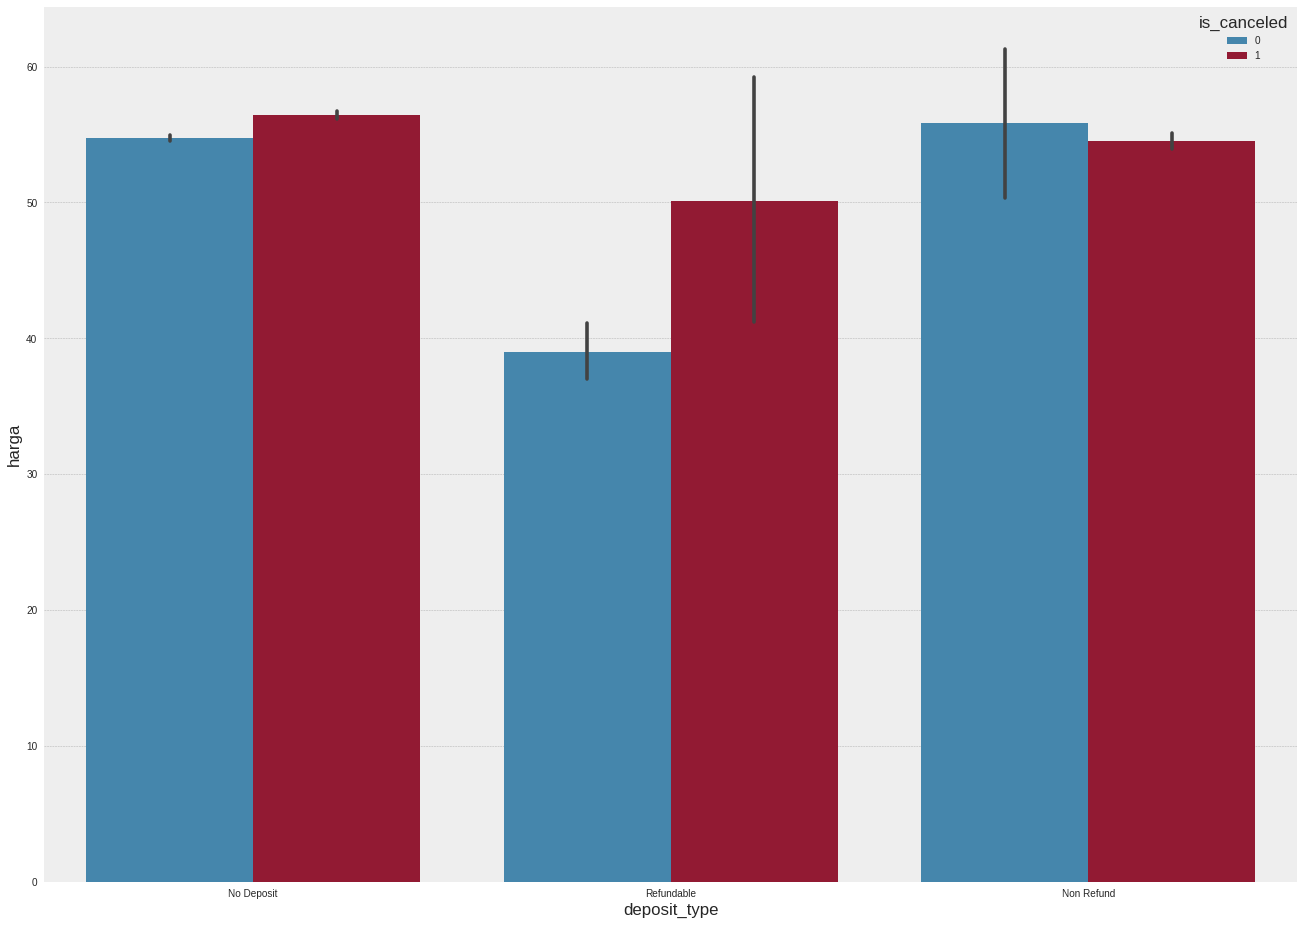

In [ ]:
plt.figure(figsize=(20,15))
g = sns.barplot(x="deposit_type",y="price", hue = 'is_canceled', data=train_hotel)
g = g.set_ylabel("harga")

In [ ]:
train_hotel.groupby(['is_canceled'])['is_canceled'].count()

is_canceled
0    75011
1    44199
Name: is_canceled, dtype: int64

In [ ]:
train_hotel.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

hotel                        2
arrival_date_month          12
meal                         5
country                    178
market_segment               8
distribution_channel         5
reserved_room_type           9
assigned_room_type          11
deposit_type                 3
customer_type                4
reservation_status_date    926
dtype: int64

In [ ]:
def describe_categorical(df):
  cat_feature = [col for col in list(df.columns) if df[col].dtypes == 'object']
  desc = pd.DataFrame()
  for col in cat_feature:
    print(df[col].value_counts())
    print()

describe_categorical(train_hotel)

City Hotel      79163
Resort Hotel    40047
Name: hotel, dtype: int64

August       13861
July         12644
May          11780
October      11147
April        11078
June         10929
September    10500
March         9768
February      8052
November      6771
December      6759
January       5921
Name: arrival_date_month, dtype: int64

BB           92236
HB           14458
SC           10549
Undefined     1169
FB             798
Name: meal, dtype: int64

PRT    48483
GBR    12120
FRA    10401
ESP     8560
DEU     7285
       ...  
NAM        1
ATF        1
MRT        1
HND        1
BDI        1
Name: country, Length: 178, dtype: int64

Online TA        56408
Offline TA/TO    24182
Groups           19791
Direct           12582
Corporate         5282
Complementary      728
Aviation           235
Undefined            2
Name: market_segment, dtype: int64

TA/TO        97750
Direct       14611
Corporate     6651
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

VISUALISASI DATA

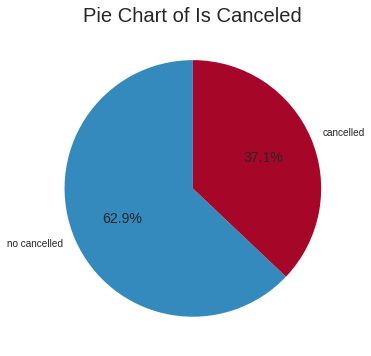

In [ ]:
import matplotlib.pyplot as plt
val = train_hotel['is_canceled'].value_counts()
label = ['no cancelled', 'cancelled']

plt.pie(val, labels = label, startangle = 90, autopct = '%.1f%%')
plt.title('Pie Chart of Is Canceled')
plt.show()

In [ ]:
plt.style.use('default')

Text(0.5, 1.0, 'Distribution of Previous Cancellations')

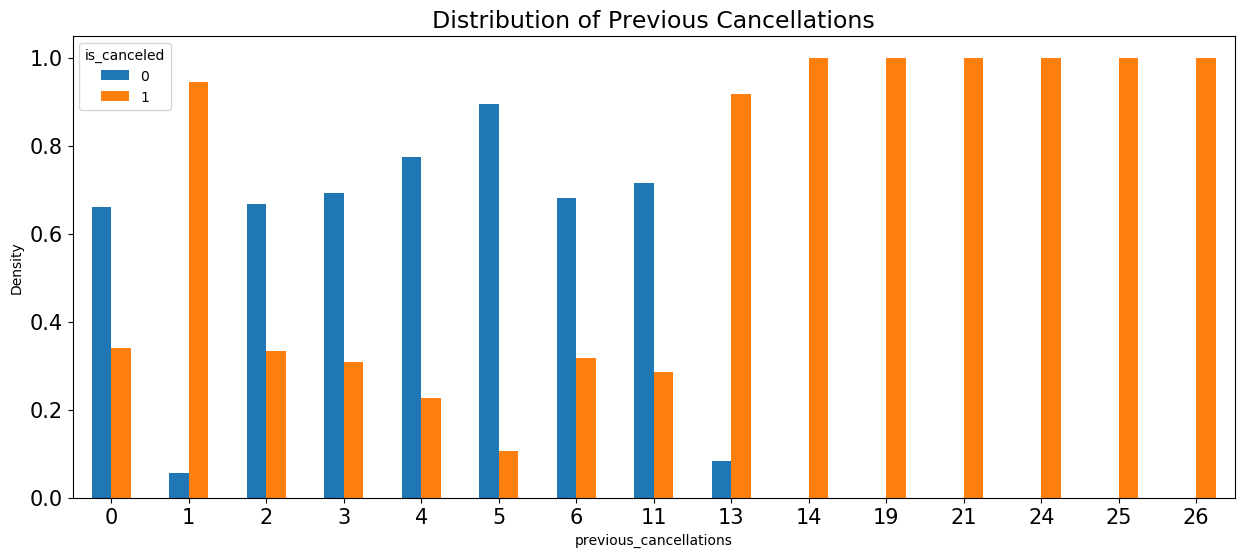

In [ ]:
ic_deposit = pd.crosstab(train_hotel['is_canceled'], train_hotel['previous_cancellations'])
ic_deposit = ic_deposit.div(ic_deposit.sum())
ax = ic_deposit.T.plot(kind='bar', stacked = False, rot = 0, figsize = (15,6),
                  fontsize=15)
plt.ylabel('Density')
plt.title('Distribution of Previous Cancellations', fontsize=17)

In [ ]:
plt.style.use('fivethirtyeight')

Text(0.5, 1.0, 'Distribution of Deposit Type')

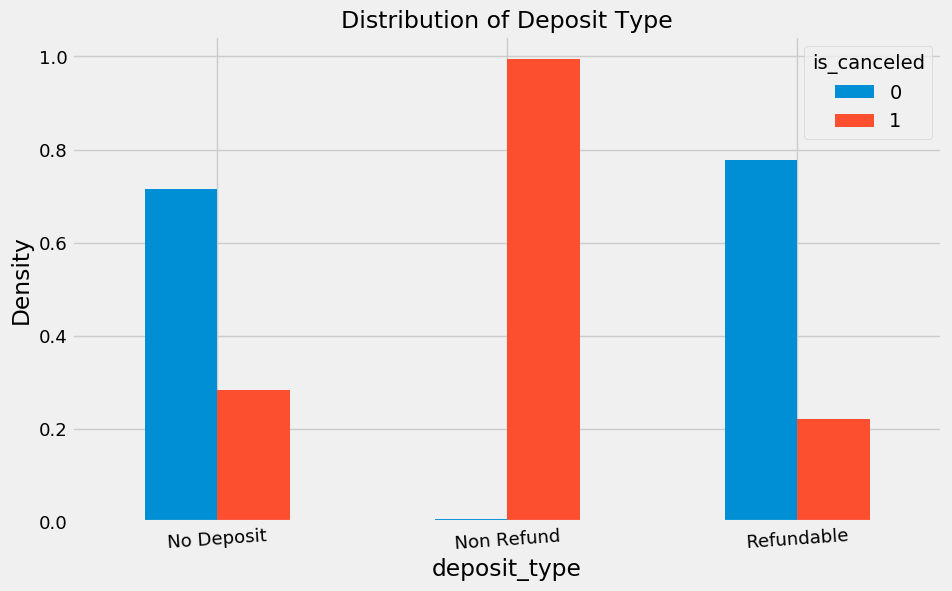

In [ ]:
#print(train_hotel[''].value_counts().div(len(train_hotel['previous_cancellations']))*100)

#Full Stacked Barplot cross selling berdasarkan deposit

ic_deposit = pd.crosstab(train_hotel['is_canceled'], train_hotel['deposit_type'])
ic_deposit = ic_deposit.div(ic_deposit.sum())
ax = ic_deposit.T.plot(kind='bar', stacked = False, rot = 4, figsize = (10,6),
                 title = 'Distribution of Booking Changes', fontsize=13)
plt.ylabel('Density')
plt.title('Distribution of Deposit Type', fontsize=17)
#plt.style.use('seaborn')

In [ ]:
train_hotel.groupby(['previous_cancellations', 'is_canceled'])['previous_cancellations'].count()

previous_cancellations  is_canceled
0                       0              74472
                        1              38259
1                       0                336
                        1               5712
2                       0                 76
                        1                 38
3                       0                 45
                        1                 20
4                       0                 24
                        1                  7
5                       0                 17
                        1                  2
6                       0                 15
                        1                  7
11                      0                 25
                        1                 10
13                      0                  1
                        1                 11
14                      1                 14
19                      1                 19
21                      1                  1
24                 

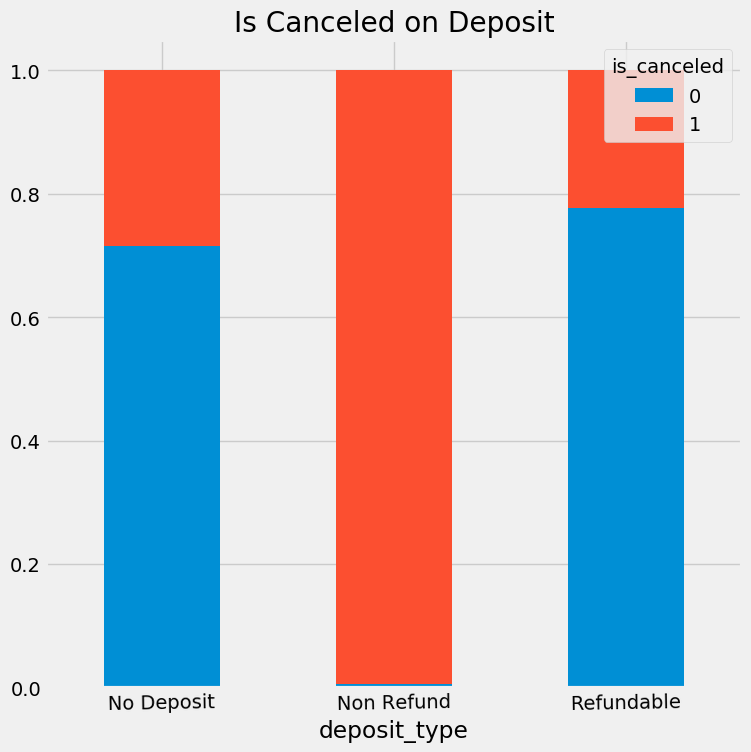

In [ ]:
ic_deposit = pd.crosstab(train_hotel['is_canceled'], train_hotel['deposit_type'])
ic_deposit = ic_deposit.div(ic_deposit.sum())
ax = ic_deposit.T.plot(kind='bar', stacked = True, rot = 1, figsize = (8,8),
                 title = 'Is Canceled on Deposit')

count    119210.000000
mean        104.109227
std         106.875450
min           0.000000
25%          18.000000
50%          69.000000
75%         161.000000
max         737.000000
Name: lead_time, dtype: float64

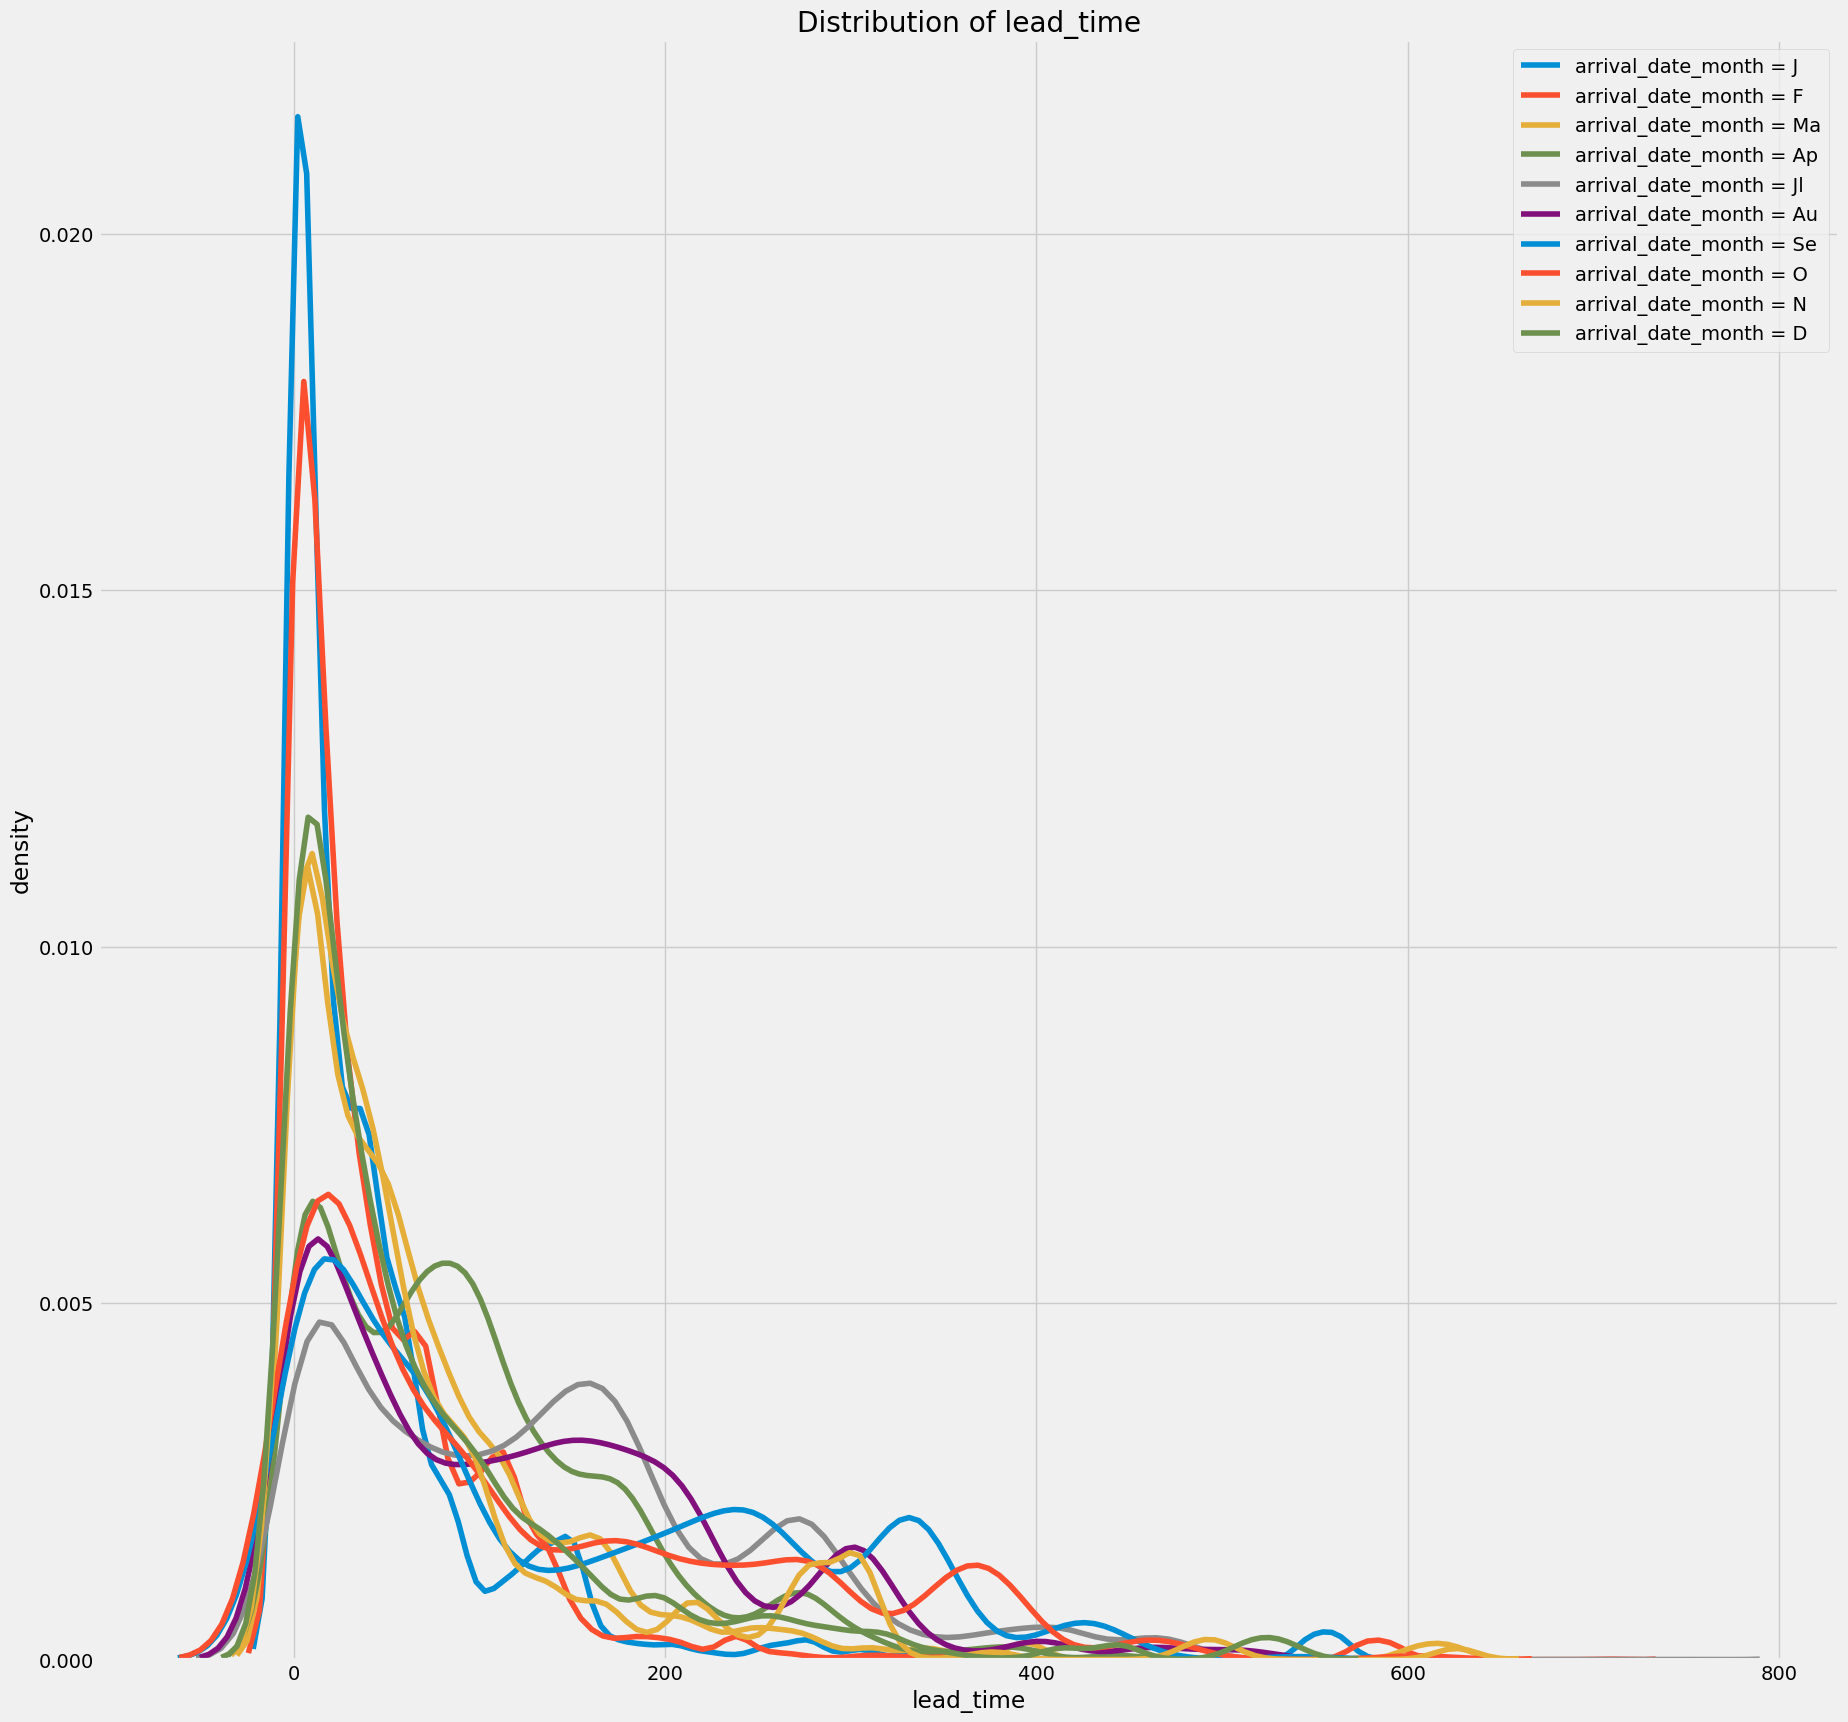

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,20))

sns.kdeplot(train_hotel.loc[train_hotel['arrival_date_month'] == 'January', 'lead_time'], label = 'arrival_date_month = J')
sns.kdeplot(train_hotel.loc[train_hotel['arrival_date_month'] == 'February', 'lead_time'], label = 'arrival_date_month = F')
sns.kdeplot(train_hotel.loc[train_hotel['arrival_date_month'] == 'March', 'lead_time'], label = 'arrival_date_month = Ma')
sns.kdeplot(train_hotel.loc[train_hotel['arrival_date_month'] == 'April', 'lead_time'], label = 'arrival_date_month = Ap')
sns.kdeplot(train_hotel.loc[train_hotel['arrival_date_month'] == 'Mei', 'lead_time'], label = 'arrival_date_month = Me')
sns.kdeplot(train_hotel.loc[train_hotel['arrival_date_month'] == 'Juny', 'lead_time'], label = 'arrival_date_month = Jn')
sns.kdeplot(train_hotel.loc[train_hotel['arrival_date_month'] == 'July', 'lead_time'], label = 'arrival_date_month = Jl')
sns.kdeplot(train_hotel.loc[train_hotel['arrival_date_month'] == 'August', 'lead_time'], label = 'arrival_date_month = Au')
sns.kdeplot(train_hotel.loc[train_hotel['arrival_date_month'] == 'September', 'lead_time'], label = 'arrival_date_month = Se')
sns.kdeplot(train_hotel.loc[train_hotel['arrival_date_month'] == 'October', 'lead_time'], label = 'arrival_date_month = O')
sns.kdeplot(train_hotel.loc[train_hotel['arrival_date_month'] == 'November', 'lead_time'], label = 'arrival_date_month = N')
sns.kdeplot(train_hotel.loc[train_hotel['arrival_date_month'] == 'December', 'lead_time'], label = 'arrival_date_month = D')


plt.xlabel('lead_time')
plt.ylabel('density')
plt.title('Distribution of lead_time')

train_hotel['lead_time'].describe()

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


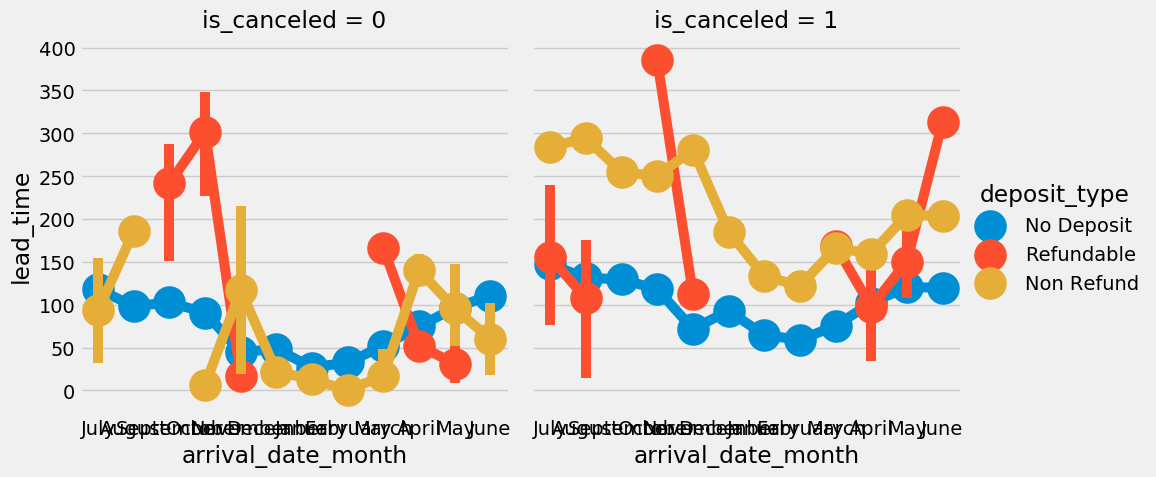

In [ ]:
sns.factorplot(x='arrival_date_month', y='lead_time', hue='deposit_type', col = 'is_canceled', data=train_hotel)
sns.set(rc={'figure.figsize':(60,60)})

In [ ]:
train_hotel['hotel'].value_counts()[0:5]

City Hotel      79163
Resort Hotel    40047
Name: hotel, dtype: int64

In [ ]:
plt.style.use('seaborn')

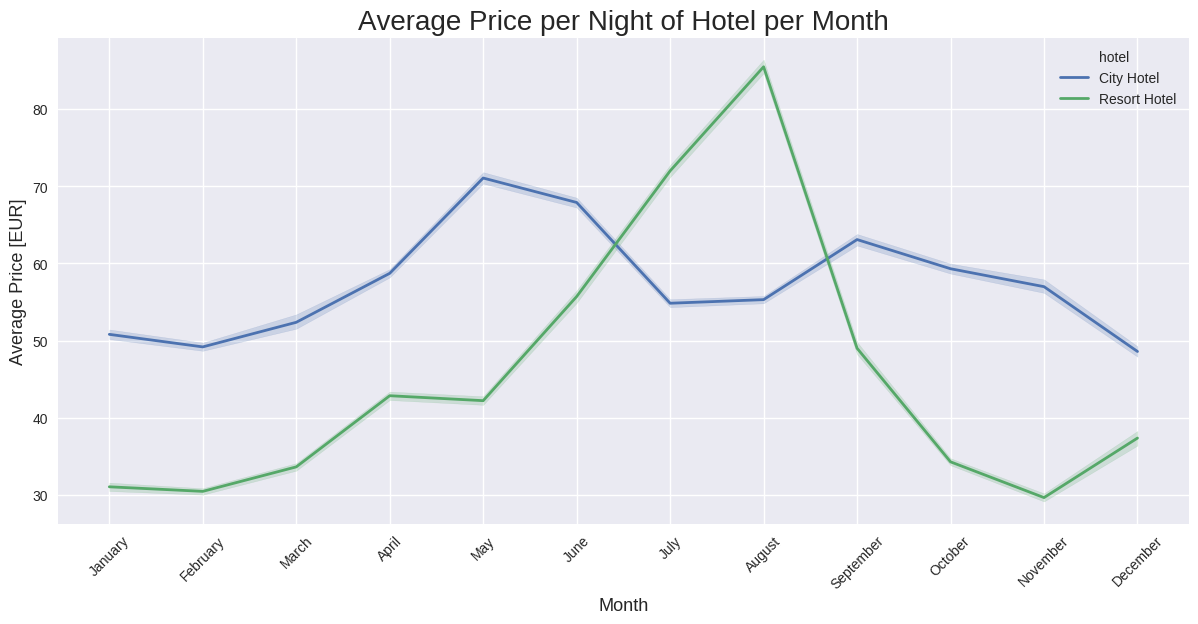

In [ ]:
room_prices_mothly = train_hotel[["hotel", "arrival_date_month", "price"]].sort_values("arrival_date_month")

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]
room_prices_mothly["arrival_date_month"] = pd.Categorical(room_prices_mothly["arrival_date_month"], categories=ordered_months, ordered=True)

# barplot with standard deviation:
plt.figure(figsize=(13, 6))
sns.lineplot(x = "arrival_date_month", y="price", hue="hotel", data=room_prices_mothly,
            hue_order = ["City Hotel", "Resort Hotel"], size="hotel", sizes=(2.0, 2.0))
plt.title("Average Price per Night of Hotel per Month", fontsize=20)
plt.xlabel("Month", fontsize=13)
plt.xticks(rotation=45)
plt.ylabel("Average Price [EUR]", fontsize=13)
plt.show()
#plt.style.use('bmh')

In [ ]:
train_hotel['adr']

0           0.00
1           0.00
2          75.00
3          75.00
4          98.00
           ...  
119205     96.14
119206    225.43
119207    157.71
119208    104.40
119209    151.20
Name: adr, Length: 119210, dtype: float64

count    119210.000000
mean         10.735400
std          53.830143
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         543.000000
Name: company, dtype: float64

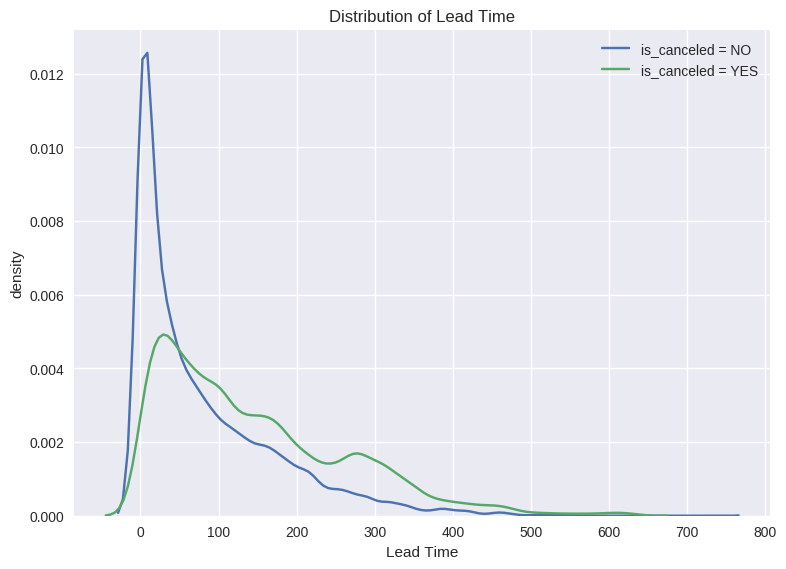

In [ ]:
plt.figure(figsize = (8,6))

sns.kdeplot(train_hotel.loc[train_hotel['is_canceled'] == 0, 'lead_time'], label = 'is_canceled = NO')
sns.kdeplot(train_hotel.loc[train_hotel['is_canceled'] == 1, 'lead_time'], label = 'is_canceled = YES')

plt.xlabel('Lead Time')
plt.ylabel('density')
plt.title('Distribution of Lead Time')

train_hotel['company'].describe()

count    119210.000000
mean         74.889078
std         107.168884
min           0.000000
25%           7.000000
50%           9.000000
75%         152.000000
max         535.000000
Name: agent, dtype: float64

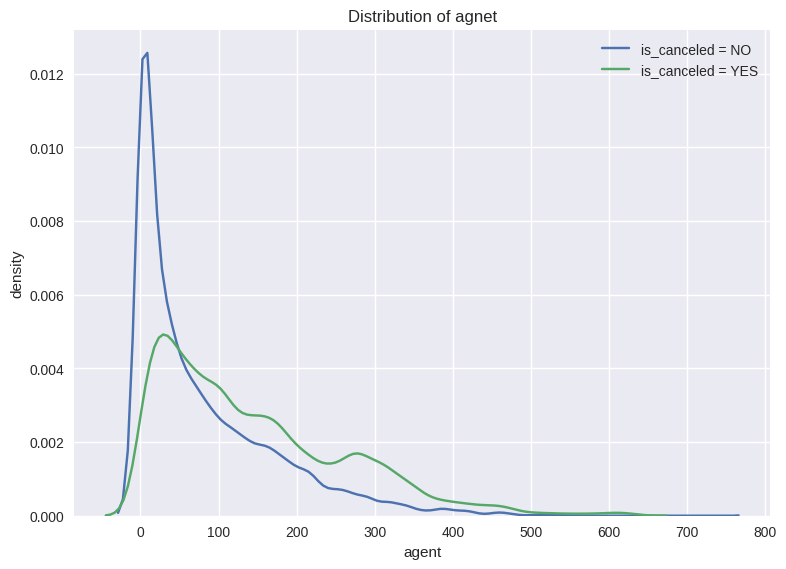

In [ ]:
plt.figure(figsize = (8,6))

sns.kdeplot(train_hotel.loc[train_hotel['is_canceled'] == 0, 'lead_time'], label = 'is_canceled = NO')
sns.kdeplot(train_hotel.loc[train_hotel['is_canceled'] == 1, 'lead_time'], label = 'is_canceled = YES')

plt.xlabel('agent')
plt.ylabel('density')
plt.title('Distribution of agnet')

train_hotel['agent'].describe()

In [ ]:
train_hotel['agent'].groupby(train_hotel['is_canceled'])

In [ ]:
train_hotel.groupby(['agent', 'is_canceled','company'])['company'].count()

agent  is_canceled  company
0.0    0            0.0        6878
                    6.0           1
                    8.0           1
                    9.0          24
                    10.0          1
                               ... 
526.0  1            0.0           1
527.0  0            0.0          35
531.0  0            0.0          22
       1            0.0          46
535.0  0            0.0           3
Name: company, Length: 1031, dtype: int64

In [ ]:
train_hotel['company'].value_counts()

0.0      112442
40.0        924
223.0       784
67.0        267
45.0        249
          ...  
234.0         1
454.0         1
497.0         1
419.0         1
489.0         1
Name: company, Length: 349, dtype: int64

In [ ]:
train_hotel['company'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: company, dtype: float64

In [ ]:
train_hotel['agent'].head(10)

0      0.0
1      0.0
2      0.0
3    304.0
4    240.0
5    240.0
6      0.0
7    303.0
8    240.0
9     15.0
Name: agent, dtype: float64

In [ ]:
train_hotel['company'].fillna(0, inplace=True)

In [ ]:
train_hotel['company'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: company, dtype: float64

In [ ]:
train_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,guess,price
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,0,2015-07-01,2.0,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,0,2015-07-01,2.0,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,0,2015-07-02,1.0,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,0,2015-07-02,1.0,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0.0,0,Transient,98.0,0,1,0,2015-07-03,2.0,49.0


0    93.784917
1     6.187400
2     0.023488
3     0.002517
8     0.001678
Name: required_car_parking_spaces, dtype: float64


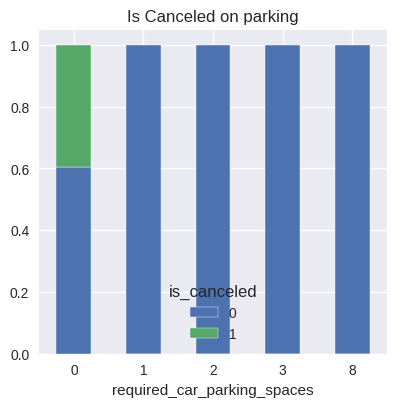

In [ ]:
print(train_hotel['required_car_parking_spaces'].value_counts().div(len(train_hotel['required_car_parking_spaces']))*100)

#Full Stacked Barplot cross selling berdasarkan deposit

ic_meal = pd.crosstab(train_hotel['is_canceled'], train_hotel['required_car_parking_spaces'])
ic_meal = ic_meal.div(ic_meal.sum())
ax = ic_meal.T.plot(kind='bar', stacked = True, rot = 1, figsize = (4,4),
                 title = 'Is Canceled on parking')

In [ ]:
train_hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
train_hotel['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'L', 'K'],
      dtype=object)

TA/TO        81.998155
Direct       12.256522
Corporate     5.579230
GDS           0.161899
Undefined     0.004194
Name: distribution_channel, dtype: float64


Text(0, 0.5, 'density')

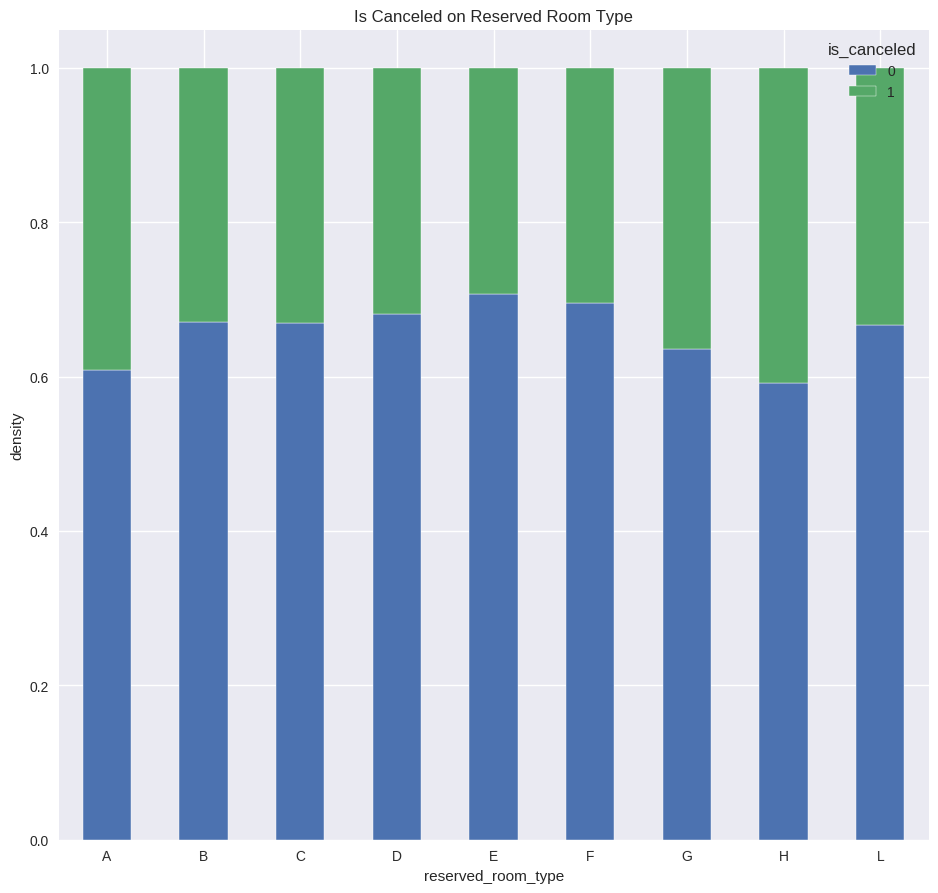

In [ ]:
print(train_hotel['distribution_channel'].value_counts().div(len(train_hotel['distribution_channel']))*100)

#Full Stacked Barplot cross selling berdasarkan deposit

ic_meal = pd.crosstab(train_hotel['is_canceled'], train_hotel['reserved_room_type'])
ic_meal = ic_meal.div(ic_meal.sum())
ax = ic_meal.T.plot(kind='bar', stacked = True, rot = 1, figsize = (10,10),
                 title = 'Is Canceled on Reserved Room Type')
plt.ylabel('density')

In [ ]:
train_hotel['agent'].unique()

array([  0., 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

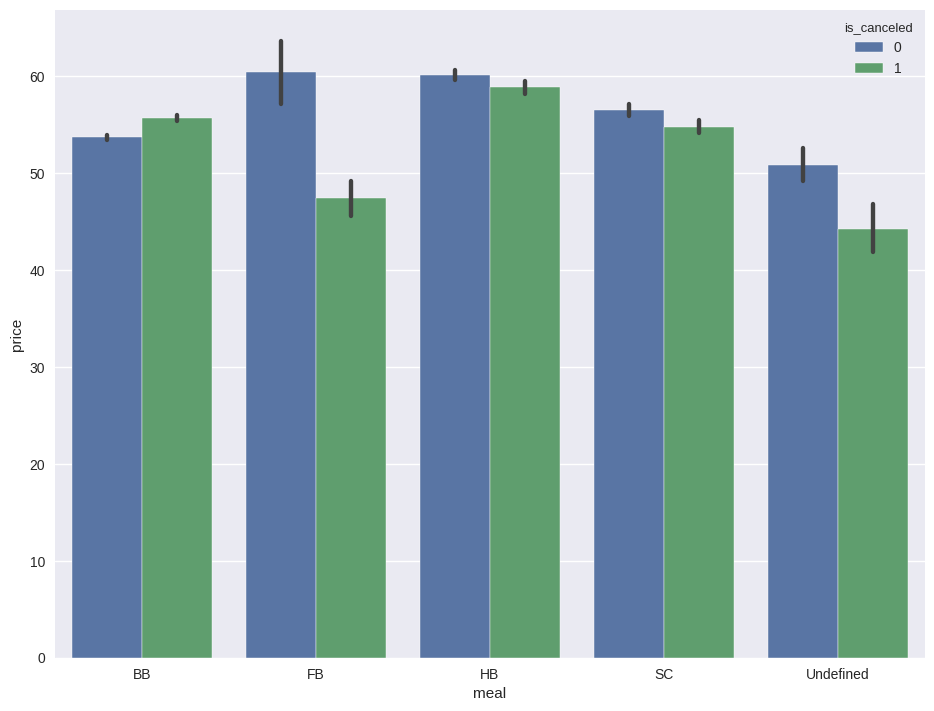

In [ ]:
plt.figure(figsize=(10,8))
g = sns.barplot(x="meal",y="price", hue='is_canceled', data=train_hotel)
g = g.set_ylabel("price")

TA/TO        81.998155
Direct       12.256522
Corporate     5.579230
GDS           0.161899
Undefined     0.004194
Name: distribution_channel, dtype: float64


Text(0, 0.5, 'density')

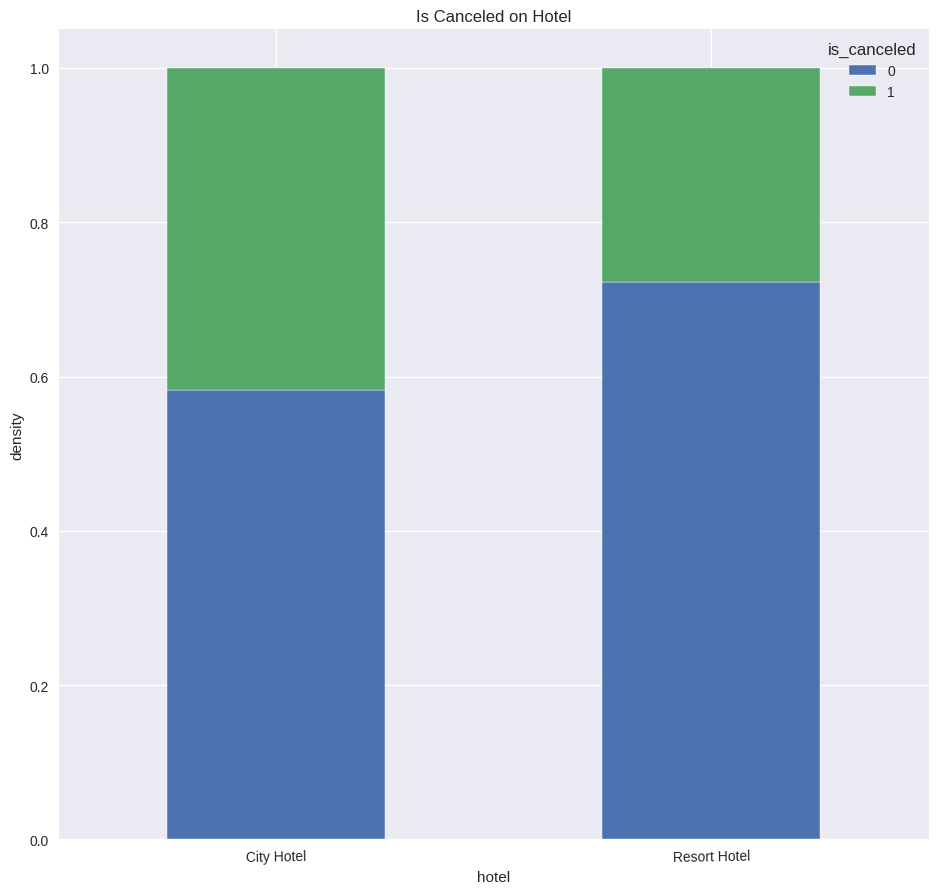

In [ ]:
print(train_hotel['distribution_channel'].value_counts().div(len(train_hotel['distribution_channel']))*100)

#Full Stacked Barplot cross selling berdasarkan deposit

ic_meal = pd.crosstab(train_hotel['is_canceled'], train_hotel['hotel'])
ic_meal = ic_meal.div(ic_meal.sum())
ax = ic_meal.T.plot(kind='bar', stacked = True, rot = 1, figsize = (10,10),
                 title = 'Is Canceled on Hotel')
plt.ylabel('density')